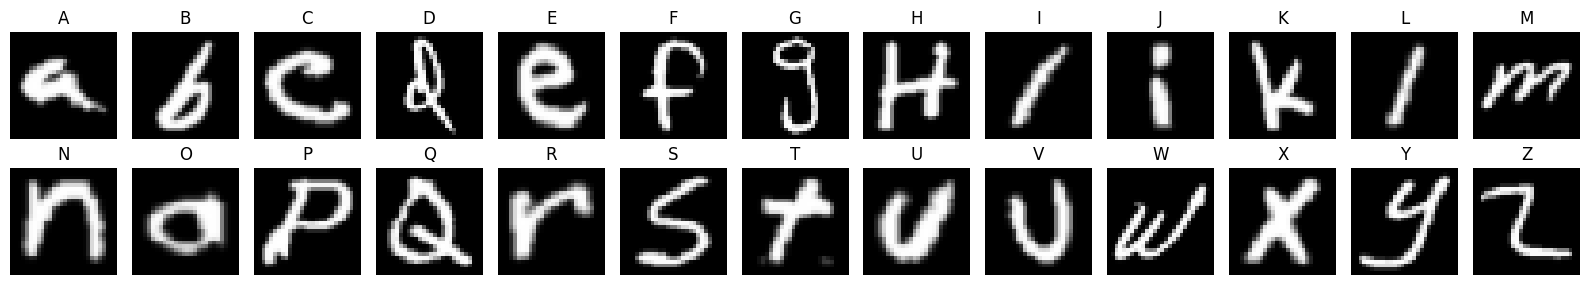

In [6]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# 加载EMNIST Letters测试集
test_data = torchvision.datasets.EMNIST(
    root='./data',
    train=False,
    transform=None,  # 注意：此处不用ToTensor，否则不能用numpy操作
    download=False,
    split='letters'
)
# 原始图片是 (N, 28, 28)，像素类型 uint8
images = test_data.data.numpy()
labels = test_data.targets.numpy()

fig, axs = plt.subplots(2, 13, figsize=(16, 3))

for i in range(1, 27):
    idx = np.where(labels == i)[0][0]
    img = images[idx]
    # 还原正方向：先顺时针90度，再左右翻转
    img_corrected = np.fliplr(np.rot90(img, -1))  # 还原正常显示
    ax = axs[(i-1)//13, (i-1)%13]
    ax.imshow(img_corrected, cmap='gray')
    ax.set_title(chr(i+64))  # chr(65)='A'
    ax.axis('off')

plt.tight_layout()
plt.show()


# 变暗

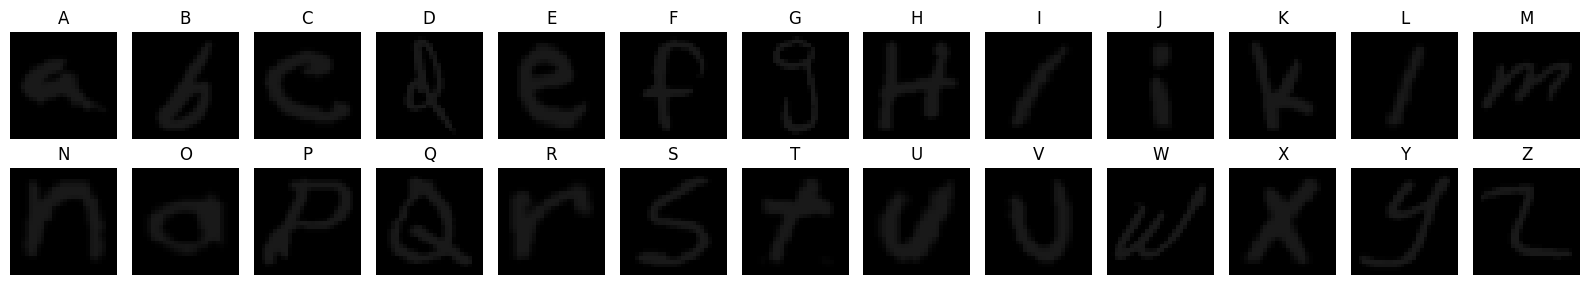

In [14]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

def darken_emnist_img_uint8(img, factor=0.1):
    """
    输入uint8图片，像素缩暗到原值的factor倍，输出uint8图片
    """
    img_dark = (img * factor).clip(0, 255).astype(np.uint8)
    return img_dark

# 载入EMNIST Letters测试集
test_data = torchvision.datasets.EMNIST(
    root='./data',
    train=False,
    transform=None,
    download=False,
    split='letters'
)
labels = test_data.targets.numpy()

def emnist_letter_image(idx, dataset):
    img = dataset.data[idx].numpy()
    # 还原为正常方向
    img_corrected = np.fliplr(np.rot90(img, -1))
    return img_corrected

# 展示26个字母的变暗效果
fig, axs = plt.subplots(2, 13, figsize=(16, 3))
# fig.suptitle("20 EMNIST", fontsize=16)

for i in range(1, 27):
    idx = np.where(labels == i)[0][0]
    img = emnist_letter_image(idx, test_data)
    img_dark = darken_emnist_img_uint8(img, factor=0.1)
    ax = axs[(i-1)//13, (i-1)%13]
    ax.imshow(img_dark, cmap='gray', vmin=0, vmax=255)
    ax.set_title(chr(i+64))
    ax.axis('off')

plt.tight_layout()
plt.show()


# 二值化

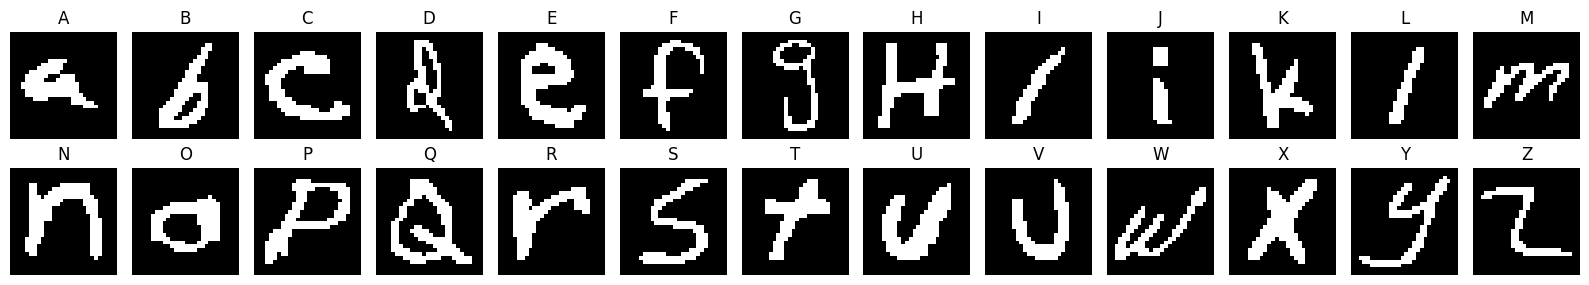

In [46]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# 加载EMNIST Letters测试集
test_data = torchvision.datasets.EMNIST(
    root='./data',
    train=False,
    transform=None,  # 注意不用ToTensor，保留numpy格式
    download=False,
    split='letters'
)
images = test_data.data.numpy()
labels = test_data.targets.numpy()

fig, axs = plt.subplots(2, 13, figsize=(16, 3))

for i in range(1, 27):
    idx = np.where(labels == i)[0][0]
    img = images[idx]
    # 还原正方向：先顺时针90度，再左右翻转
    img_corrected = np.fliplr(np.rot90(img, -1))
    # 二值化处理（黑白两色）
    threshold = 128
    img_binary = np.where(img_corrected >= threshold, 255, 0).astype(np.uint8)
    ax = axs[(i-1)//13, (i-1)%13]
    ax.imshow(img_binary, cmap='gray', vmin=0, vmax=255)
    ax.set_title(chr(i+64))  # chr(65)='A'
    ax.axis('off')

plt.tight_layout()
plt.show()


# 调整灰度

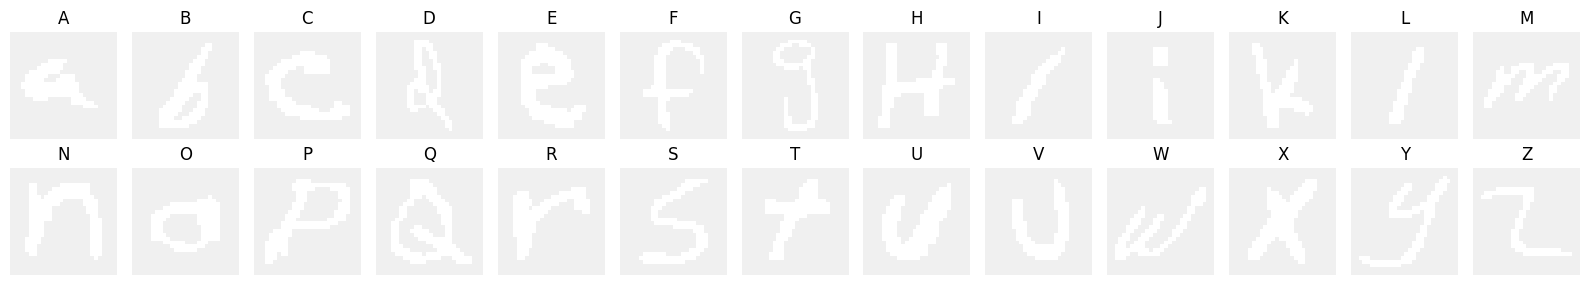

In [10]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# 加载EMNIST Letters测试集
test_data = torchvision.datasets.EMNIST(
    root='./data',
    train=False,
    transform=None,  # 注意不用ToTensor，保留numpy格式
    download=False,
    split='letters'
)
images = test_data.data.numpy()
labels = test_data.targets.numpy()

fig, axs = plt.subplots(2, 13, figsize=(16, 3))

for i in range(1, 27):
    idx = np.where(labels == i)[0][0]
    img = images[idx]
    # 还原正方向：先顺时针90度，再左右翻转
    img_corrected = np.fliplr(np.rot90(img, -1))
    # 二值化处理（黑白两色）
    threshold = 128
    img_binary = np.where(img_corrected >= threshold, 255, 0).astype(np.uint8)
    # 把0值变为150（灰色）
    img_binary[img_binary == 0] = 240
    ax = axs[(i-1)//13, (i-1)%13]
    ax.imshow(img_binary, cmap='gray', vmin=0, vmax=255)
    ax.set_title(chr(i+64))  # chr(65)='A'
    ax.axis('off')

plt.tight_layout()
plt.show()
